In [1]:
# !pip install tensorflow

In [2]:
%matplotlib inline 

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
import numpy as np
 
from PIL import Image
import requests
from io import BytesIO

加载模型

In [3]:
model = Xception(weights='imagenet', include_top=True)

加载图片

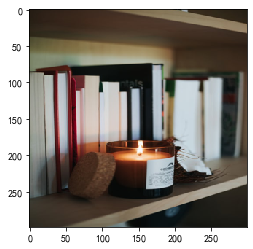

In [4]:
# img = image.load_img(image_file_path, target_size=(299, 299))　 # 从硬盘加载图片

url = "https://images.unsplash.com/photo-1611090480455-fc0ea8ef5792?ixid=MXwxMjA3fDB8MHx0b3BpYy1mZWVkfDM2MXxSX0Z5bi1Hd3Rsd3x8ZW58MHx8fA%3D%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=500&q=60"
rsp = requests.get(url)
img = Image.open(BytesIO(rsp.content))

# 调整大小为299*299 以适应Xception模型的输入格式
img = img.resize((299,299))
plt.imshow(img)

把图片转换成NumPy数组，并做预测

In [5]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
 
features = model.predict(x)

# 打印前 10 识别的对象
decode_predictions(features, top=10)

[[('n02948072', 'candle', 0.5540947),
  ('n04201297', 'shoji', 0.03528823),
  ('n04590129', 'window_shade', 0.022406286),
  ('n04330267', 'stove', 0.01924976),
  ('n03388549', 'four-poster', 0.01494646),
  ('n04239074', 'sliding_door', 0.010124662),
  ('n03201208', 'dining_table', 0.009404816),
  ('n03992509', "potter's_wheel", 0.009054),
  ('n02699494', 'altar', 0.0068786764),
  ('n03179701', 'desk', 0.0058375616)]]

识别出来是蜡烛